# Customer Segmentation - Classification Problem

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the Train Data File

In [ ]:
df = pd.read_csv("Train_Customer_Segmentation.csv")

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# Setting ID column as Index

In [ ]:
df = df.set_index(['ID'])

# Identifying Missing Values

In [ ]:
df.isnull().sum()*100/len(df)

Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

# Handling Missing Values

In [ ]:
#Handling Missing Values of Numeric Features
df['Family_Size'] = df['Family_Size'].replace(np.NaN, df['Family_Size'].mean())

df['Work_Experience'] = df['Work_Experience'].replace(np.NaN, df['Work_Experience'].mean())

print(df.isnull().sum()*100/len(df))

#Handling Missing Values of Categorical Features 
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])
df['Graduated'] = df['Graduated'].fillna(df['Graduated'].mode()[0])
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Var_1'] = df['Var_1'].fillna(df['Var_1'].mode()[0])

print(df.isnull().sum()*100/len(df))

Gender             0.000000
Ever_Married       1.735250
Age                0.000000
Graduated          0.966782
Profession         1.536936
Work_Experience    0.000000
Spending_Score     0.000000
Family_Size        0.000000
Var_1              0.941993
Segmentation       0.000000
dtype: float64
Gender             0.0
Ever_Married       0.0
Age                0.0
Graduated          0.0
Profession         0.0
Work_Experience    0.0
Spending_Score     0.0
Family_Size        0.0
Var_1              0.0
Segmentation       0.0
dtype: float64


In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


# Checking For Data Type Mismatch and Categorical Format Null Values

In [ ]:
#Checking For Data Type Mismatch and Categorical Format Null Values
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df['Age'] = df['Age'].astype(float)

# Identifying Outliers Using Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b60d9ef40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b60dac640>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f3b60d9ebb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b60dacd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b60db6040>],
 'means': []}

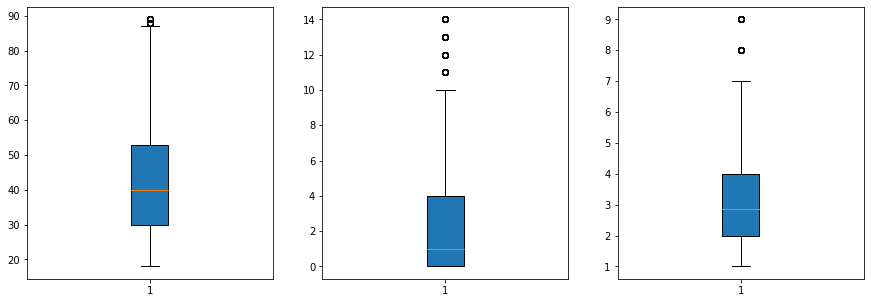

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'], patch_artist=True)

plt.subplot(1, 3, 2)
plt.boxplot(df['Work_Experience'], patch_artist=True)

plt.subplot(1, 3, 3)
plt.boxplot(df['Family_Size'], patch_artist=True)

# Handling Outliers - 

**Upper Bound Outiers with Upper Bound Value** 

**Lower Bound Outliers with Lower Bound Value**

In [ ]:
#General Function for Outlier Handling
def outlier_handler(df, column):
    q1, q3 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lb = q1 - iqr*1.5
    ub = q3 + iqr*1.5
    df.loc[df[column]>ub, column] = ub
    df.loc[df[column]<lb, column] = lb
  
#Outlier Handling
outlier_handler(df, 'Age')
outlier_handler(df, 'Work_Experience')
outlier_handler(df, 'Family_Size')

# Outliers Removed 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b606af430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b606afaf0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f3b606af070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b606bb1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b606bb4f0>],
 'means': []}

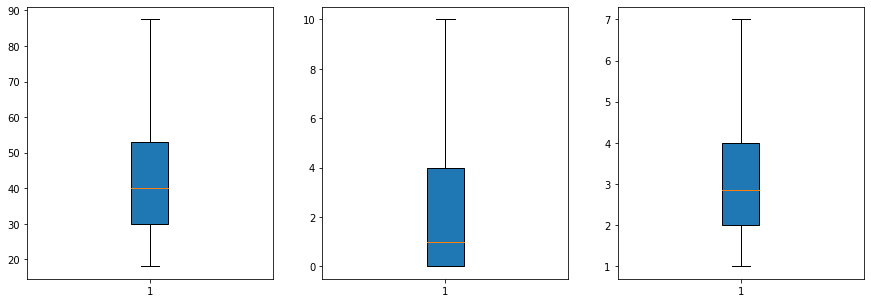

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'], patch_artist=True)

plt.subplot(1, 3, 2)
plt.boxplot(df['Work_Experience'], patch_artist=True)

plt.subplot(1, 3, 3)
plt.boxplot(df['Family_Size'], patch_artist=True)

# Exploratory Data Analysis (EDA)

# Univariate Analysis

In [ ]:
#EDA
#Univariate Analysis of Numerical Features:
df.describe() #Max Age is 89 and Max Work_Ex is 14, this doesnt match up.

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.458044,2.584152,2.833018
std,16.687991,3.064799,1.441370
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,2.850123
75%,53.000000,4.000000,4.000000
max,87.500000,10.000000,7.000000


# Analysis

**1. Major chunk of customers lie between age 30 to 53.**

**2. Major chunk of customers have work-ex between 0-4 years**

**3. Major chunk of customers have a family size of 2-4 people.**


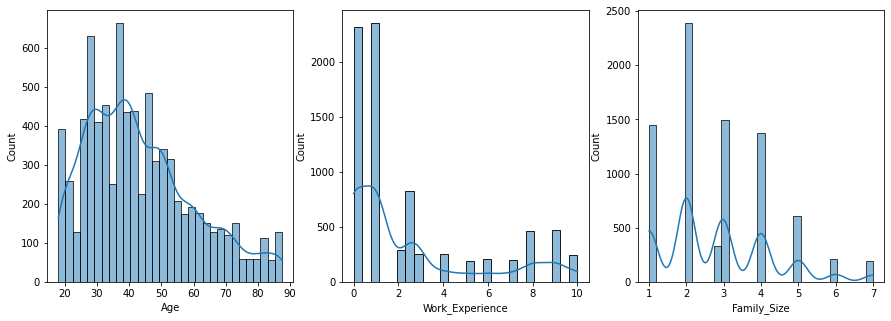

In [ ]:
#EDA
#Univariate Analysis of Numerical Features:

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)

plt.subplot(1, 3, 2)
sns.histplot(df['Work_Experience'], kde=True)

plt.subplot(1, 3, 3)
sns.histplot(df['Family_Size'], kde=True)

# Analysis
**1. Maximum customers are from the age group 28-40**
**2. Maximum customers have work-ex ranging from 0-1 years**
**3. Maximum customers have family size of 2**

**This actually doesnt add up pretty good because people aged 28-40 cannot have work-ex 0-1 years**

In [ ]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

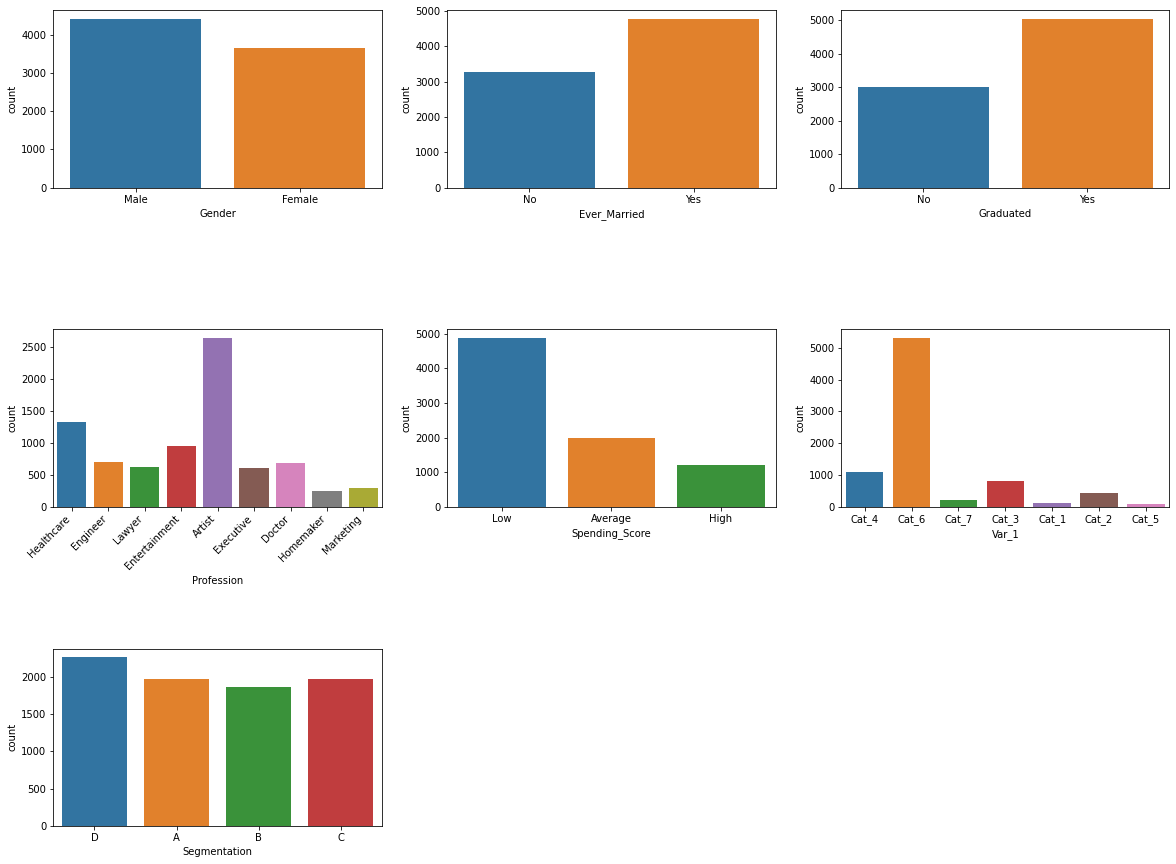

In [ ]:
#EDA
#Univariate Analysis of Categorical Features

plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.8)

plt.subplot(3, 3, 1)
sns.countplot(x = 'Gender', data=df)

plt.subplot(3, 3, 2)
sns.countplot(x = 'Ever_Married', data=df)

plt.subplot(3, 3, 3)
sns.countplot(x = 'Graduated', data=df)

plt.subplot(3, 3, 4)
sns.countplot(x = 'Profession', data=df)
plt.xticks(rotation=45, ha="right")

plt.subplot(3, 3, 5)
sns.countplot(x = 'Spending_Score', data=df)

plt.subplot(3, 3, 6)
sns.countplot(x = 'Var_1', data=df)

plt.subplot(3, 3, 7)
sns.countplot(x = 'Segmentation', data=df)

# Bivariate Analysis

**Heatmap**

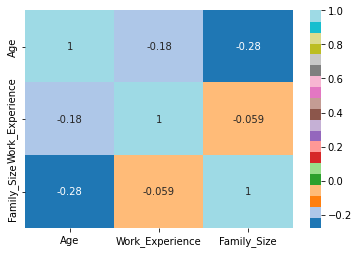

In [ ]:
sns.heatmap(df.corr(), cmap="tab20", annot=True)

# Analysis

**1. There is no correlation between numerical features**

**Scatterplot**

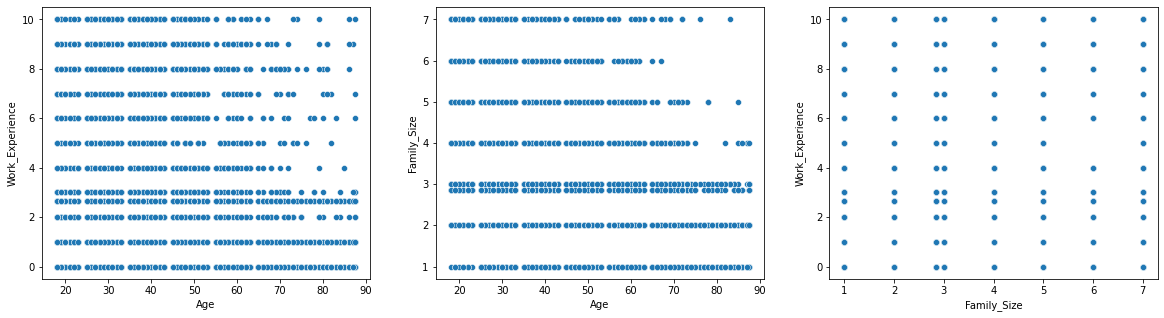

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x = df['Age'], y = df['Work_Experience'], data=df)

plt.subplot(1, 3, 2)
sns.scatterplot(x = df['Age'], y = df['Family_Size'], data=df)

plt.subplot(1, 3, 3)
sns.scatterplot(x = df['Family_Size'], y = df['Work_Experience'], data=df)

# Analysis

**There is no clustering or correlation between numerical features**

**Frequency of Each Numerical Feature in Each Segment**

In [ ]:
df.groupby(by="Segmentation").agg('mean')[['Age', 'Work_Experience', 'Family_Size']]

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.909229,2.772050,2.444605
B,48.193488,2.354252,2.693517
C,49.136041,2.243887,2.954013
D,33.384921,2.904673,3.179925


# Kernel Distribution Estimation Plot (KDE)

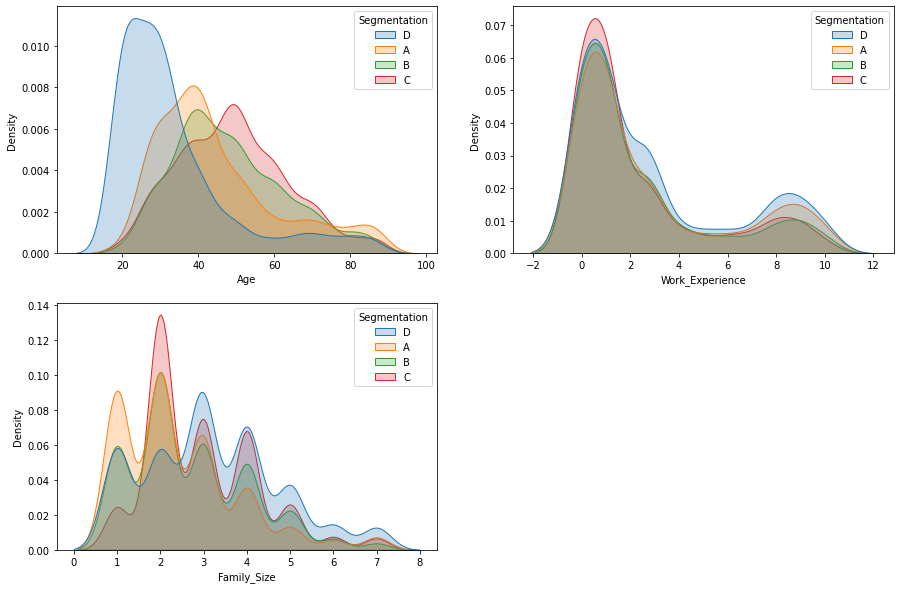

In [ ]:
#Bivariate Analysis of Numerical Feature

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='Age', hue='Segmentation', fill=True)

plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='Work_Experience', hue='Segmentation', fill=True)

plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='Family_Size', hue='Segmentation', fill=True)

# Count Plot

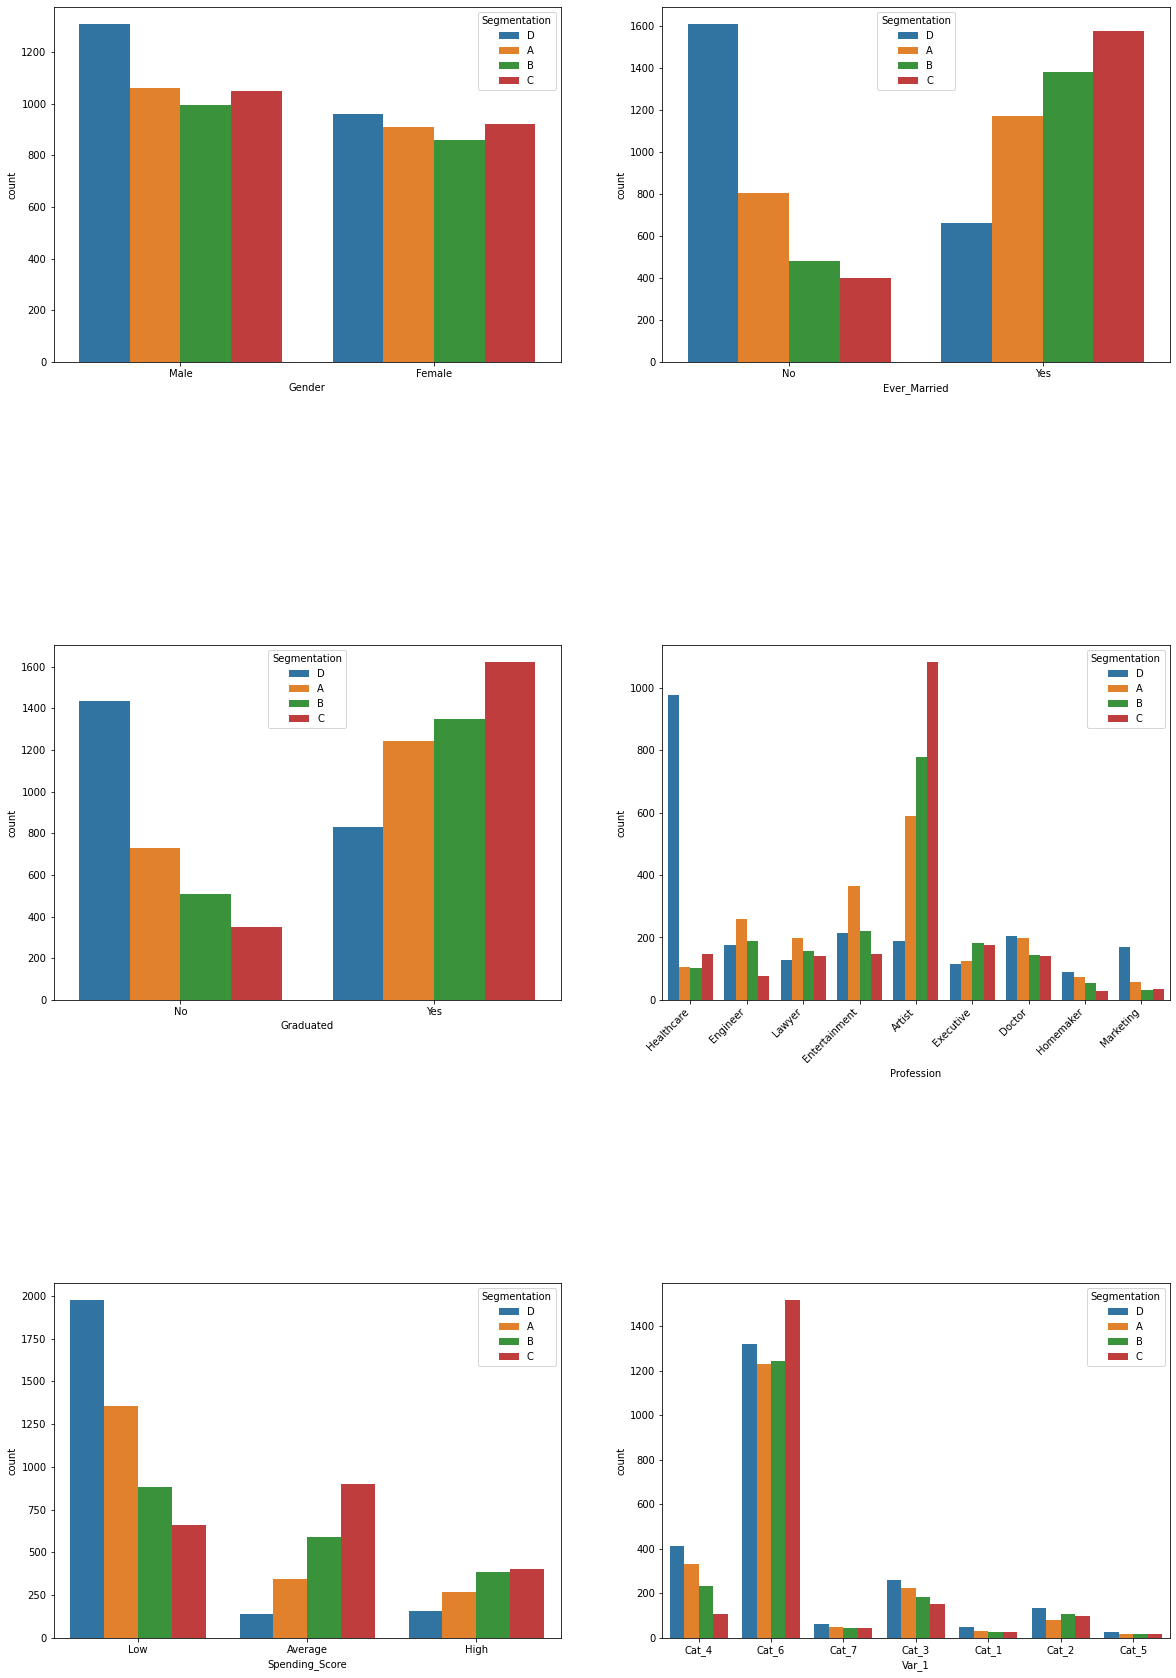

In [ ]:
#Bivariate Analysis of Categorical Features

plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace = 0.8)

plt.subplot(3, 2, 1)
sns.countplot(x='Gender', hue='Segmentation', data=df)

plt.subplot(3, 2, 2)
sns.countplot(x='Ever_Married', hue='Segmentation', data=df)

plt.subplot(3, 2, 3)
sns.countplot(x='Graduated', hue='Segmentation', data=df)

plt.subplot(3, 2, 4)
sns.countplot(x='Profession', hue='Segmentation', data=df)
plt.xticks(rotation=45, ha="right")

plt.subplot(3, 2, 5)
sns.countplot(x='Spending_Score', hue='Segmentation', data=df)

plt.subplot(3, 2, 6)
sns.countplot(x='Var_1', hue='Segmentation', data=df)

#Tabular Description of Count Plot 

In [ ]:
pd.crosstab(df['Segmentation'], df['Gender'])

Gender,Female,Male
Segmentation,,
A,909,1063
B,861,997
C,922,1048
D,959,1309


In [ ]:
pd.crosstab(df['Segmentation'], df['Ever_Married'])

Ever_Married,No,Yes
Segmentation,,
A,801,1171
B,479,1379
C,398,1572
D,1607,661


In [ ]:
pd.crosstab(df['Segmentation'], df['Graduated'])

Graduated,No,Yes
Segmentation,,
A,729,1243
B,508,1350
C,348,1622
D,1437,831


In [ ]:
pd.crosstab(df['Segmentation'], df['Profession'])

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Segmentation,,,,,,,,,
A,591,199,259,365,125,106,73,197,57
B,778,143,189,221,183,101,55,158,30
C,1083,140,75,148,175,146,28,140,35
D,188,206,176,215,116,979,90,128,170


In [ ]:
pd.crosstab(df['Segmentation'], df['Spending_Score'])

Spending_Score,Average,High,Low
Segmentation,,,
A,343,271,1358
B,590,384,884
C,903,405,662
D,138,156,1974


In [ ]:
pd.crosstab(df['Segmentation'], df['Var_1'])

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,
A,31,83,223,333,19,1232,51
B,26,106,186,232,20,1245,43
C,26,99,154,109,18,1517,47
D,50,134,259,415,28,1320,62


In [ ]:
pd.crosstab(df['Spending_Score'], df['Ever_Married'])

Ever_Married,No,Yes
Spending_Score,,
Average,0,1974
High,0,1216
Low,3285,1593


# Analysis

**1. Gender is not a factor for segmentation.**
**2. Merital Status is a factor for segmentation.**
**3. Graduation is a factor for segmentation.**
**4. Profession is a factor for segmentation.**
**5. Spending Score is a factor for segmentation.**
**6. Var_1/Category is not much of a factor for segmentation.**

# MultiVariate Analysis

# Pair Plot

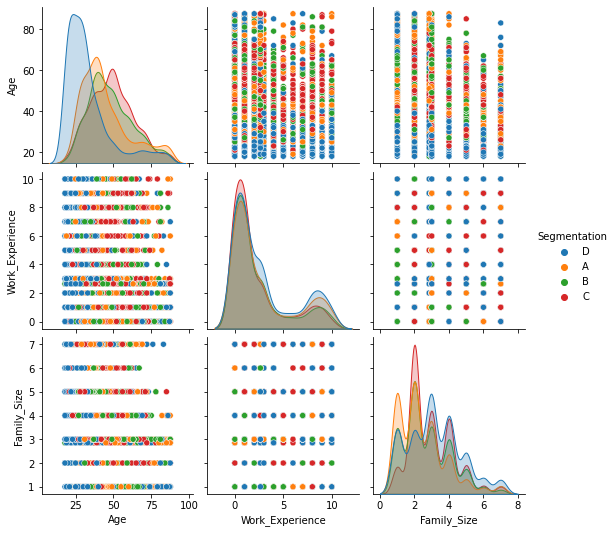

In [ ]:
sns.pairplot(df, hue='Segmentation')

# Encoding

In [ ]:
#Encoding
#One Hot Encoding
df = pd.get_dummies(df, columns=['Profession', 'Var_1'])
df.head()

#Label Encoding
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Ever_Married'] = encoder.fit_transform(df['Ever_Married'])
df['Graduated'] = encoder.fit_transform(df['Graduated'])
df['Spending_Score'] = encoder.fit_transform(df['Spending_Score'])
df['Segmentation'] = encoder.fit_transform(df['Segmentation'])

df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
462809,1,0,22.0,0,1.000000,2,4.0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
462643,0,1,38.0,1,2.641663,0,3.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
466315,0,1,67.0,1,1.000000,2,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
461735,1,1,67.0,1,0.000000,1,2.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
462669,0,1,40.0,1,2.641663,1,6.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting of Data into Contributing Factors (x) and Target Variable (y)

In [ ]:
x = df.drop('Segmentation', axis=1)
y = df['Segmentation']

# Correlation amongst all the features using Heatmap 

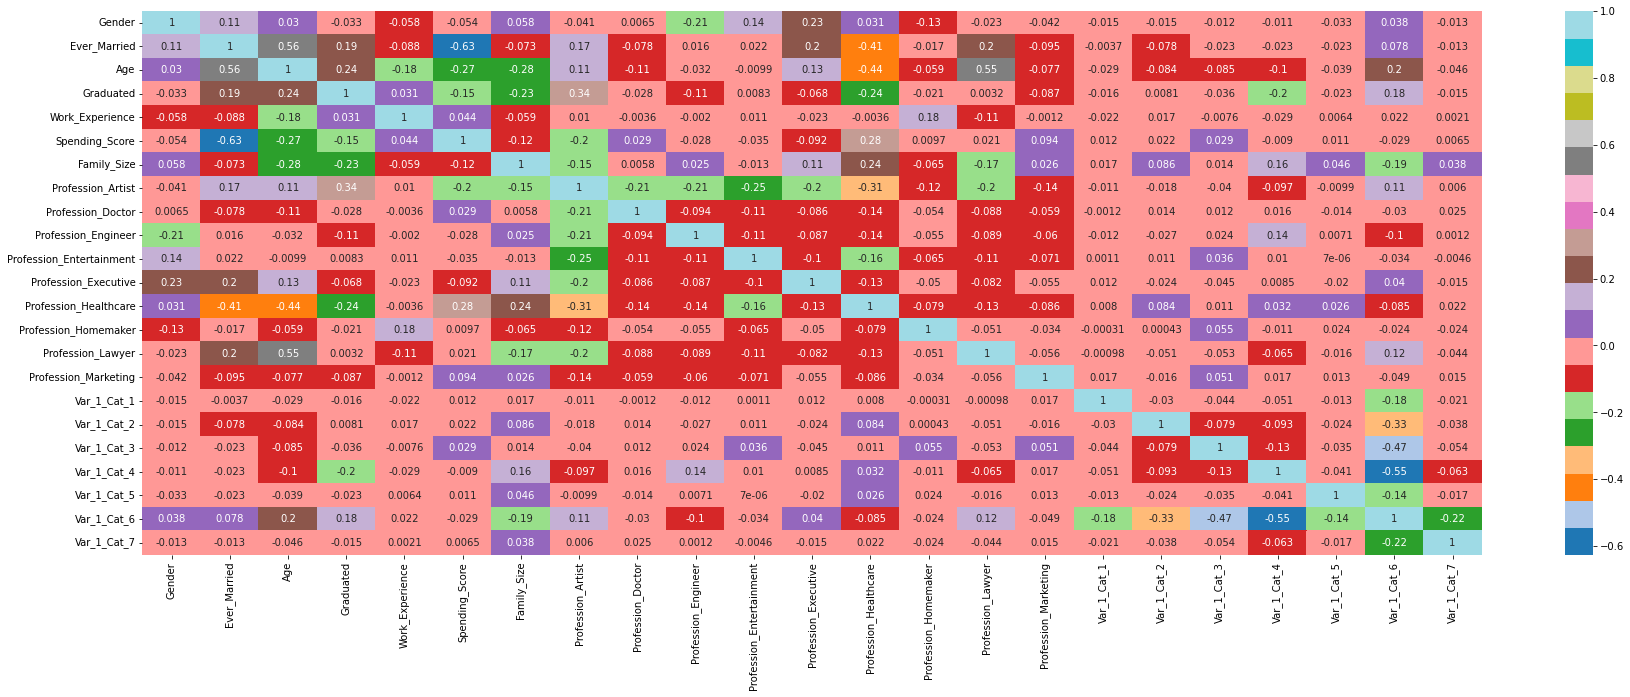

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(x.corr(), cmap="tab20", annot=True)

# Model Building

# Logistic Regression - Accuracy 51.388%

In [ ]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=1).fit(x, y)
y_pred = lr.predict(x)
accuracy_lr = accuracy_score(y, y_pred)
print(accuracy_lr*100,"%")

51.388200297471485 %


# Naive Bayes - Accuracy 47.682%

In [ ]:
#Naive Bayes Classifier Model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x, y)
y_pred = nb.predict(x)
accuracy_nb = accuracy_score(y, y_pred)
print(accuracy_nb*100,"%")

47.682201289043135 %


# Decision Tree Classifier - Accuracy 95.649%

In [ ]:
#Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x, y)
y_pred = clf.predict(x)
accuracy_dt = accuracy_score(y, y_pred)
print(accuracy_dt*100,"%")

95.64947942488845 %


# Random Forest Classifier - Accuracy 95.649%

In [ ]:
#Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)  
rf.fit(x, y)
y_pred = rf.predict(x)
accuracy_rf = accuracy_score(y, y_pred)
print(accuracy_rf*100,"%")

95.64947942488845 %


#Hyperparameter Tuning of Random Forest Classifier Using Randomized Search CV

In [ ]:
#Hyperparameter Tuning of Random Forest Classifier Using Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [90, 100, 115, 130]

criterion = ['gini', 'entropy']

max_depth = range(2, 20, 1)
 
max_features = ['auto', 'log2']

min_samples_split = range(2, 10, 1)

min_samples_leaf = range(1, 10, 1)
rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=6), 
                   param_distributions = rf_grid, 
                   cv = 5, n_iter = 10)
# fit the model
model.fit(x, y)
model.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 12}

# Tuned Random Forest Classifier Model

In [ ]:
#Tuned Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_tuned = RandomForestClassifier(n_estimators = 130, min_samples_split = 6, min_samples_leaf = 7, max_features = 'log2', max_depth = 13)  
rf_tuned.fit(x, y)
y_pred = rf_tuned.predict(x)
accuracy = accuracy_score(y, y_pred)
print(accuracy*100,"%")

60.969261279127416 %


# Support Vector Machine Classifier - Accuracy 50.855%

In [ ]:
#Support Vector Machine Classifier Model

from sklearn.svm import SVC  
sv = SVC(kernel='linear') 
sv.fit(x, y)
y_pred = sv.predict(x) 
accuracy_svc = accuracy_score(y, y_pred)
print(accuracy_svc*100,"%")

50.85523054040655 %


# K-Nearest Neighbours - Accuracy 95.649%

In [ ]:
#KNN Classifier Model

from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=8, metric='manhattan', weights='distance')
knnc.fit(x, y)
y_pred = knnc.predict(x)
accuracy_knn = accuracy_score(y, y_pred)
print(accuracy_knn*100,"%")

95.64947942488845 %


# Hyperparameter Tuning of KNN Classifier Using Grid Search CV

In [ ]:
#Tuning KNN Classifier Using Grid Search CV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knnc = KNeighborsClassifier()

grid_params = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_search = GridSearchCV(estimator=knnc, param_grid=grid_params, verbose=1, n_jobs=-1, cv=3)
grid_result = grid_search.fit(x, y)

grid_result.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

# Tuned KNN Classifier Model - Accuracy 57.511%

In [ ]:
# Tuned KNN Classifier 

from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='uniform')
knnc.fit(x, y)
y_pred = knnc.predict(x)
accuracy = accuracy_score(y, y_pred)
print(accuracy*100,"%")

57.51115518096183 %


# XGBoost Classifier - Accuracy 56.544%

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x, y)
y_pred = xgb.predict(x)
accuracy = accuracy_score(y, y_pred)
print(accuracy*100,"%")

56.54437283093704 %


# Tuned XGBoost Model - Accuracy 95.649%

In [ ]:
#Tuned XGBoost Model
from xgboost import XGBClassifier

# xgb = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=1000)
xgb = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=1000)
xgb.fit(x, y)
y_pred = xgb.predict(x)
accuracy_xg = accuracy_score(y, y_pred)
print(accuracy_xg*100,"%")

95.64947942488845 %


# Light Gradient Boosting Machine - Accuracy 64.365%

In [ ]:
import lightgbm as lgb
lgclf = lgb.LGBMClassifier()
lgclf.fit(x, y)
y_pred=lgclf.predict(x)
accuracy = accuracy_score(y, y_pred)
print(accuracy*100,"%")

64.36539414972732 %


# Tuned LGBM Model - Accuracy 95.649%

In [ ]:
#Tuned LGBM Classifier Model

import lightgbm as lgb
lgclf = lgb.LGBMClassifier(n_estimators=1800, learning_rate=0.3)
lgclf.fit(x, y)
y_pred=lgclf.predict(x)
accuracy_lgb = accuracy_score(y, y_pred)
print(accuracy_lgb*100,"%")

95.64947942488845 %


# Using Optuna - Automated Hyperparameter Tuning Framework

In [ ]:
# !pip install optuna

**Optuna For Random Forest Classifier**

In [ ]:
# #Using Optuna For Automated Hyperparameter Tuning and Optimization

# import optuna
# import sklearn
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#   criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#   max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
#   n_estimators = trial.suggest_int('n_estimators', 100, 500)

#   rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
#   score = cross_val_score(rfc, x, y, n_jobs=-1, cv=3)
#   accuracy=score.mean()
#   return accuracy

# study=optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=15)

# The Best Accuracy and Best Hyperparameter Values for achieving it

In [ ]:
# trial = study.best_trial
# print(trial.value*100, "%")
# print(trial.params)

# Reading Test Data

In [ ]:
df_test = pd.read_csv('Test_Customer_Segmentation.csv')
df_test = df_test.set_index(['ID'])
df_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


# Handling Missing Values in Test Data

In [ ]:
#Handling Missing Values of Numeric Features
df_test['Family_Size'] = df_test['Family_Size'].replace(np.NaN, df_test['Family_Size'].mean())

df_test['Work_Experience'] = df_test['Work_Experience'].replace(np.NaN, df_test['Work_Experience'].mean())

print(df_test.isnull().sum()*100/len(df_test))

#Handling Missing Values of Categorical Features 
df_test['Ever_Married'] = df_test['Ever_Married'].fillna(df_test['Ever_Married'].mode()[0])
df_test['Graduated'] = df_test['Graduated'].fillna(df_test['Graduated'].mode()[0])
df_test['Profession'] = df_test['Profession'].fillna(df_test['Profession'].mode()[0])
df_test['Var_1'] = df_test['Var_1'].fillna(df_test['Var_1'].mode()[0])

print(df_test.isnull().sum()*100/len(df_test))

Gender             0.000000
Ever_Married       1.903312
Age                0.000000
Graduated          0.913590
Profession         1.446517
Work_Experience    0.000000
Spending_Score     0.000000
Family_Size        0.000000
Var_1              1.218120
dtype: float64
Gender             0.0
Ever_Married       0.0
Age                0.0
Graduated          0.0
Profession         0.0
Work_Experience    0.0
Spending_Score     0.0
Family_Size        0.0
Var_1              0.0
dtype: float64


# Identifying and Handling Outliers

In [ ]:
#General Function for Outlier Handling
def outlier_handler(df_test, column):
    q1, q3 = np.quantile(df_test[column], 0.25), np.quantile(df_test[column], 0.75)
    iqr = q3 - q1
    lb = q1 - iqr*1.5
    ub = q3 + iqr*1.5
    df_test.loc[df_test[column]>ub, column] = ub
    df_test.loc[df_test[column]<lb, column] = lb
#Outlier Handling
outlier_handler(df_test, 'Age')
outlier_handler(df_test, 'Work_Experience')
outlier_handler(df_test, 'Family_Size')

# Encoding of Test Data

In [ ]:
#Encoding
#One Hot Encoding
df_test_done = df_test.copy()
df_test = pd.get_dummies(df_test, columns=['Profession', 'Var_1'])
df_test.head()


#Label Encoding
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_test['Gender'] = encoder.fit_transform(df_test['Gender'])
df_test['Ever_Married'] = encoder.fit_transform(df_test['Ever_Married'])
df_test['Graduated'] = encoder.fit_transform(df_test['Graduated'])
df_test['Spending_Score'] = encoder.fit_transform(df_test['Spending_Score'])

df_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
458989,0,1,36.0,1,0.000000,2,1.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
458994,1,1,37.0,1,7.500000,0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
458996,0,1,69.0,0,0.000000,2,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
459000,1,1,59.0,0,7.500000,1,2.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
459001,0,0,19.0,0,2.552587,2,4.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Model Comparison

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Models')]

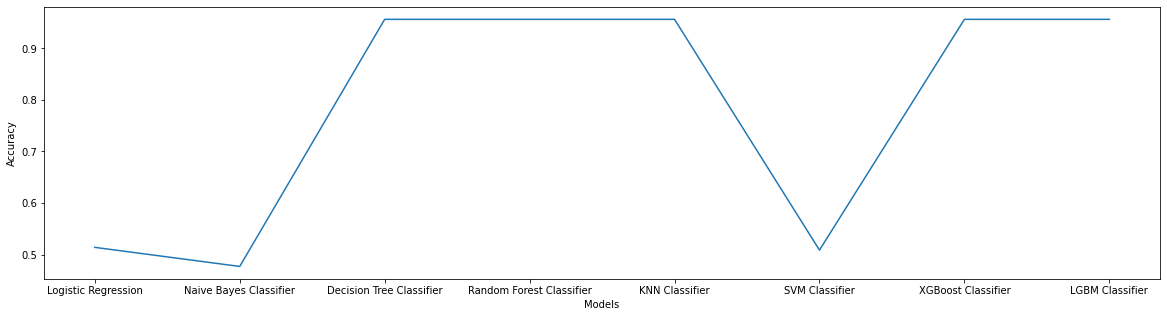

In [ ]:
plt.figure(figsize=(20,5))
models = ['Logistic Regression', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN Classifier', 'SVM Classifier', 'XGBoost Classifier', 'LGBM Classifier']
ax = sns.lineplot(x=models, y=[accuracy_lr, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svc, accuracy_xg, accuracy_lgb])
ax.set(xlabel='Models', ylabel='Accuracy')


# Using Best Model to Predict Target Variable of Test Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x, y)
y_pred = clf.predict(df_test)

In [ ]:
df_test['Segmentation'] = y_pred

In [ ]:
df_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
ID,,,,,,,,,,,,,,,,,,,,,
458989,0,1,36.0,1,0.000000,2,1.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
458994,1,1,37.0,1,7.500000,0,4.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
458996,0,1,69.0,0,0.000000,2,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
459000,1,1,59.0,0,7.500000,1,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
459001,0,0,19.0,0,2.552587,2,4.0,0,0,0,...,0,1,0,0,0,0,0,1,0,2


In [ ]:
df_test['Segmentation'] = df_test['Segmentation'].replace([0, 1, 2, 3], ['A', 'B', 'C', 'D'])
df_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
ID,,,,,,,,,,,,,,,,,,,,,
458989,0,1,36.0,1,0.000000,2,1.0,0,0,1,...,0,0,0,0,0,0,0,1,0,B
458994,1,1,37.0,1,7.500000,0,4.0,0,0,0,...,0,0,0,0,0,0,0,1,0,B
458996,0,1,69.0,0,0.000000,2,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0,D
459000,1,1,59.0,0,7.500000,1,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,C
459001,0,0,19.0,0,2.552587,2,4.0,0,0,0,...,0,1,0,0,0,0,0,1,0,C


In [ ]:
df_test_done['Segmentation'] = df_test['Segmentation']
df_test_done.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
458989,Female,Yes,36.0,Yes,Engineer,0.000000,Low,1.0,Cat_6,B
458994,Male,Yes,37.0,Yes,Healthcare,7.500000,Average,4.0,Cat_6,B
458996,Female,Yes,69.0,No,Artist,0.000000,Low,1.0,Cat_6,D
459000,Male,Yes,59.0,No,Executive,7.500000,High,2.0,Cat_6,C
459001,Female,No,19.0,No,Marketing,2.552587,Low,4.0,Cat_6,C


# Exporting the Predicted Value File

In [ ]:
df_test_done.to_csv("Predicted_Data.csv", index=False)

# Conclusion: 

1. The first step in this project is to import the required libraries.

2. Second step is to read the dataset.

3. Now, set the ID column as an Index.

4. Fourth step is to identify missing/null values in the dataset.

5. Next step is to handle missing values. Since there are broadly two types of variable/features in the dataset **a) Numerical/Continuous and b) Categorical**.

We handle both of them in different ways.

a) For missing values in **numerical features** we replace them with the **mean** of that particular feature's all values.

b) For missing values in **categorical features** we replace them with the **mode** of that particular feature's all values.

6. Then we check for any kind of bad data or implicit missing values, for example "???" or "Unkwown" values in the dataset. For that we use **df.types** and **df[column].unique()**.

7. The next step is to identify outliers.

8. Instead of removing outliers, we replace upper bound outliers with upper bound values and lower bound outliers with lower bound values.

9. Now, it is time to perform EDA on the data to get some implicit patterns and information from the data. EDA is done particularly in three ways:

**a) Univariate Analysis:** Find out different patterns and implicit data by plotting a single feature/variable.

**b) Bivariate Analysis:** Find out different patterns and implicit data by plotting two features/variables.

**c) Multivariate Analysis:** Find out different patterns and implicit data by plotting multiple or all features/variables.**

**10. Univariate Analysis:**

**a) df.describe():** We get important statistical data about all the numerical features in the dataset like mean, standard deviation, etc.

**b) Histplot:** 
1. We analyze that maximum customers are from the age group 28-40. 
2. Maximum customers have work-ex ranging from 0-1 years.
3. Maximum customers have family size of 2.

**c) Countplot:**
1. We observe that more males as compared to females are the customers of the company.
2. The company has more married people as customers than unmarried.
3. More graduated people are the customers of the company than ungraduated.
4. The most common professions of the customers are: artist, healthcare, entertainment, doctor and engineer.
5. Most of the customers have a low spending score i.e. most of the customers are not hefty spenders in the company.
6. Majority of the customers fall in the category 6.
7. All the customers are almost equally split into all 4 segments of A, B, C and D with segment D having the maximum customers.

**11. Bivariate Analysis:**

**a) Heatmap:**

We observe that there is very low correlation between the numerical features i.e. the numerical features are very loosely dependent on each other.

**b) Scatterplot:**

The scatterplot confirms that there is very less correlation and no clear clustering or grouping between numerical features.

**c) KDE Plot:**

The KDE Plot with "hue" set to "segmentation" tells us about the density of each numerical feature in each segment. For example, segment D has majority of people having age between 20-28 years and segment C has majority of the people having a family size of 2.

**d) Countplot:**

1. We can easily observe that segment D has more males as compared to females. 2. Segment D has a vast majority of unmarried customers than married.

**12. Multivariate Analysis:**

**a) Pairplot:**

This paints us an entire picture of the distribution and correlation of multiple features with each other.
We can observe that there exists very less correlation and clustering amongst the features. 
We can also observe that each segment has its own bias for a particular value of a particular feature.

**13. Encoding:**
This is done because models are nothing but algorithms which has mathematics as basis to it and math can be performed only on numbers. So, encoding is done to systematically convert categorical features into numerical features without causing loss of data/information.

We have performed two types of encoding:

**a) One Hot Encoding**

**b) Label Encoding**

One Hot Encoding has been performed on the following features:
1. Profession
2. Var_1

Label Encoding has been performed on the following features:
1. Gender
2. Ever_Married
3. Graduated
4. Spending_Score
5. Segmentation

**14. Splitting of Data:**
Now, after encoding, it is time to split the data into:

**a) Contributing Factors (x)**

**b) Target Variable (y)**

Here our Target Variable is "Segmentation". All the other features are contributing factors.

**15. Model Building:**
In this step, we focus on building a model to classify new data into given 4 segments of A, B, C and D.

We have applied the following model:
1. Logistic Regression - Accuracy 51.388%
2. Naive Bayes Classifier - Accuracy 47.682%
3. Decision Tree Classifier - Accuracy 95.649%
4. Random Forest Classifier - Accuract 95.649%
5. Support Vector Machine Classifier - Accuracy 50.855%
6. K-Nearest Neighbors Classifier - Accuracy 95.649%
7. XGBoost Classifier - Accuract 95.649%
8. LGBM Classifier - Accuracy 95.649%

**16. Hyperparameter Tuning:**

This is done to find the right and effective hyperparameter values of the model to improve the accuracy and optimize the performance of the model.

Different hyperparameter tuning techniques have been used:

**a) Randomized Search Cross Validation**

**b) Grid Search Cross Validation**

**c) Optuna Framework**

**17. Model Comparison:**

This is done to compare and find out the best model with highest accuracy and best performance.

We have plotted a graph that compares all the models that we have tried to provide a better visualization of the comparison.

**18. Reading the Test Data:**
Now, is the time to read the test data.

**19. Pre-Processing of Test Data:**

We perform all the preprocessing steps that we performed on train data above, on the test data as well.

**20. Model Seleciton:**

We select and use the best model to give us the predicted classifications on the data.

**21. Exporting the Final Predicted Dataset:**

Finally we have the output that we desired for and now the project is complete. We now have a final copy of the predictions for the test data which we export and save it for future use. This marks the end of the project.